In [377]:
# Import all required libraries
from sklearn import preprocessing  #fit_transform adopted by this..
# data analysis and wrangling
import numpy as np
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize']= (16,8)

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

from sklearn import preprocessing
en = preprocessing.LabelEncoder()

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

# Data Cleaning
First and Foremost..
Converting object or string types into Numeric and filling empty cells
Getting clean data to apply a model 

# Milestone 1
Last time, We have tried several methods for converting strings or objects into int they are

ata['Age']=pd.to_numeric(data['Age'], errors = 'coerce') #reading as string 
data['Gender']=np.where(data['Gender']=='F',0,1)  #assigning 0 to females and others will aoutomatically get 1

data['Date'].str.replace("/","").astype(int) #will convert date into numeric #not working rn

en = preprocessing.LabelEncoder()
data['District'] = en.fit_transform(data['District'].astype(str)) #for converting strings into numerics

Removing Unwanted cells

for x in data.index:
    if data.loc[x, "Date"] == 'Date Announced' :
        data.drop(x, inplace = True)

for x in data.index:
    if data.loc[x, "CDate"] == 'Status Date Changed' :
        data.drop(x, inplace = True)

Checking Datatypes

Droping Null Rows

and some other basic stuff


# Milstone 2
This time we'll wind up data cleaning upto 90% and then move forward for training a model

# Original Data

In [378]:
# Load the training and testing data

data = pd.read_csv('covidNew2.csv')

data.head(50)


,Date,Age,Gender,District,Status,Nationality,Type of transmission,CDate
0,30/01/2020,20,F,Thrissur,Recovered,India,Imported,14/02/2020
1,02/02/2020,NaN,NaN,Alappuzha,Recovered,India,Imported,14/02/2020
2,03/02/2020,NaN,NaN,Kasaragod,Recovered,India,Imported,14/02/2020
3,02/03/2020,45,M,East Delhi,Recovered,India,Imported,15/03/2020
4,02/03/2020,24,M,Hyderabad,Recovered,India,Imported,02/03/2020
5,03/03/2020,69,M,Italians,Recovered,Italy,Imported,03/03/2020
6,04/03/2020,55,NaN,Italians,Recovered,Italy,Imported,29/03/2020
7,04/03/2020,55,NaN,Italians,Recovered,Italy,Imported,29/03/2020
8,04/03/2020,55,NaN,Italians,Recovered,Italy,Imported,29/03/2020
9,04/03/2020,55,NaN,Italians,Recovered,Italy,Imported,29/03/2020


In [379]:
datanew = [[1,1,1,1], [1,2,2,2], [5,3,3,3], [1,4,4,4]]
trans = StandardScaler()
datanew = trans.fit_transform(datanew)
normalized_df=(datanew-datanew.min())/(datanew.max()-datanew.min())
normalized_df

array([[0.24865556, 0.        , 0.        , 0.        ],
       [0.24865556, 0.29099445, 0.29099445, 0.29099445],
       [1.        , 0.5819889 , 0.5819889 , 0.5819889 ],
       [0.24865556, 0.87298335, 0.87298335, 0.87298335]])

Normalization is good to use when you know that the distribution of your data 
does not follow a Gaussian distribution.
Standardization, on the other hand, can be helpful in cases where the data
follows a Gaussian distribution. However, this does not have to be necessarily true.

# Label Encoders

# For Status

In [380]:
data['Encoded Values'] = en.fit_transform(data['Status'].astype(str)) 
LabelData = data.drop_duplicates('Status').drop(['Date','CDate','Age','Gender','District','Nationality','Type of transmission'], axis=1).set_index('Status')
print(LabelData)

              Encoded Values
Status                      
Recovered                  3
Hospitalized               1
Deceased                   0
Migrated                   2


# For District

In [381]:
data['Encoded Values'] = en.fit_transform(data['District'].astype(str)) 
LabelData = data.drop_duplicates('District').drop(['Date','CDate','Age','Gender','Status','Nationality','Type of transmission'], axis=1).set_index('District')
print(LabelData.to_string())

                           Encoded Values
District                                 
Thrissur                              139
Alappuzha                               5
Kasaragod                              62
East Delhi                             30
Hyderabad                              43
Italians                               47
Agra                                    0
South West Delhi                      133
Ghaziabad                              37
West Delhi                            152
Leh                                    73
Kancheepuram                           56
Pathanamthitta                        103
North Delhi                            91
Jammu                                  51
Bengaluru Urban                        10
Kannur                                 58
Pune                                  109
Amritsar                                6
Ernakulam                              32
Kottayam                               68
Jaipur                            

# For Type of transmission

In [382]:
data['Encoded Values'] = en.fit_transform(data['Type of transmission'].astype(str)) 
LabelData = data.drop_duplicates('Type of transmission').drop(['Date','CDate','Age','Gender','Status','Nationality','District'], axis=1).set_index('Type of transmission')
print(LabelData.to_string())

                      Encoded Values
Type of transmission                
Imported                           0
Local                              1
TBD                                2


# For Gender

In [383]:
data['Encoded Values'] = en.fit_transform(data['Gender'].astype(str)) 
LabelData = data.drop_duplicates('Gender').drop(['Date','CDate','Age','Type of transmission','Status','Nationality','District'], axis=1).set_index('Gender')
print(LabelData)  #col.unique()

#issue solved using
#data['Gender']=np.where(data['Gender']=='F',0,1)  #assigning 0 to females and others will aoutomatically get 1

        Encoded Values
Gender                
F                    0
NaN                  2
M                    1


# For Nationality

In [384]:
data['Encoded Values'] = en.fit_transform(data['Nationality'].astype(str)) 
LabelData = data.drop_duplicates('Nationality').drop(['Date','CDate','Age','Type of transmission','Status','Gender','District'], axis=1).set_index('Nationality')
print(LabelData)

                          Encoded Values
Nationality                             
India                                  1
Italy                                  3
Canada                                 0
United Kingdom                         7
Phillipines                            4
Indonesia                              2
NaN                                    9
Thailand                               5
United States of America               8
Tibet                                  6


In [385]:
#data.index[data['Date'] == 'Date Announced'].tolist()

#or

defected = []
for x in data.index:
    if data.loc[x, "Date"] == 'Date Announced':
        defected.append(x)

print('Defected Indexes are', defected)

Defected Indexes are []


In [386]:
data.count

<bound method DataFrame.count of            Date  Age Gender             District        Status Nationality  \
0    30/01/2020   20      F             Thrissur     Recovered       India   
1    02/02/2020  NaN    NaN            Alappuzha     Recovered       India   
2    03/02/2020  NaN    NaN            Kasaragod     Recovered       India   
3    02/03/2020   45      M           East Delhi     Recovered       India   
4    02/03/2020   24      M            Hyderabad     Recovered       India   
..          ...  ...    ...                  ...           ...         ...   
979  28/03/2020   36      M  Gautam Buddha Nagar  Hospitalized         NaN   
980  28/03/2020   52      M  Gautam Buddha Nagar  Hospitalized         NaN   
981  28/03/2020   31      M  Gautam Buddha Nagar  Hospitalized         NaN   
982  28/03/2020   50      M               Meerut  Hospitalized         NaN   
983  28/03/2020  NaN    NaN             Varanasi  Hospitalized         NaN   

    Type of transmission      

# Unwanted values except strings are removed here

In [387]:
for x in data.index:
    if data.loc[x, "Status"] == 'Migrated_Other' :
        data.drop(x, inplace = True)
    
for x in data.index:
    if data.loc[x, "Type of transmission"] == 'Unknown' :
        data.drop(x, inplace = True)
        
for x in data.index:
    if data.loc[x, "Type of transmission"] == 'NaN' :
        data.drop(x, inplace = True)
        
for x in data.index:
    if data.loc[x, "Gender"] == 'Non-Binary' :
        data.drop(x, inplace = True)

# Time to Convert

In [388]:
data['Age']=pd.to_numeric(data['Age'], errors = 'coerce') #reading as string 

In [389]:
#data['Gender'] = data['Gender'].fillna('F')  # for filling empty cells with F

In [390]:
data['Gender']=np.where(data['Gender']=='F',0,1)  #assigning 0 to females and others will aoutomatically get 1

In [391]:
en = preprocessing.LabelEncoder()
data['District'] = en.fit_transform(data['District'].astype(str)) #for converting strings into numerics

In [392]:
data['Status'] = en.fit_transform(data['Status'].astype(str)) #for converting strings into numerics

In [393]:
data['Type of transmission'] = en.fit_transform(data['Status'].astype(str)) #for converting strings into numerics

In [394]:
data['Status'] = en.fit_transform(data['Status'].astype(str)) #for converting strings into numerics

In [395]:
data['Nationality'] = en.fit_transform(data['Status'].astype(str)) #for converting strings into numerics

In [396]:
data = data.drop('Encoded Values', axis=1)   #axis is used for pointing rows / records
data.head(50)

,Date,Age,Gender,District,Status,Nationality,Type of transmission,CDate
0,30/01/2020,20.0,0,139,3,3,3,14/02/2020
1,02/02/2020,NaN,1,5,3,3,3,14/02/2020
2,03/02/2020,NaN,1,62,3,3,3,14/02/2020
3,02/03/2020,45.0,1,30,3,3,3,15/03/2020
4,02/03/2020,24.0,1,43,3,3,3,02/03/2020
5,03/03/2020,69.0,1,47,3,3,3,03/03/2020
6,04/03/2020,55.0,1,47,3,3,3,29/03/2020
7,04/03/2020,55.0,1,47,3,3,3,29/03/2020
8,04/03/2020,55.0,1,47,3,3,3,29/03/2020
9,04/03/2020,55.0,1,47,3,3,3,29/03/2020


In [397]:
data.tail(50)

,Date,Age,Gender,District,Status,Nationality,Type of transmission,CDate
934,28/03/2020,NaN,1,83,1,1,1,28/03/2020
935,28/03/2020,NaN,1,83,1,1,1,28/03/2020
936,28/03/2020,NaN,1,83,1,1,1,28/03/2020
937,28/03/2020,NaN,1,83,1,1,1,28/03/2020
938,28/03/2020,NaN,1,138,1,1,1,28/03/2020
939,28/03/2020,NaN,1,138,1,1,1,28/03/2020
940,28/03/2020,NaN,1,97,1,1,1,28/03/2020
941,28/03/2020,44.0,1,67,1,1,1,28/03/2020
942,28/03/2020,NaN,1,78,1,1,1,28/03/2020
943,28/03/2020,35.0,1,62,1,1,1,28/03/2020


# Can Inverse labels If we want to..

In [398]:
#data['City'] = en.inverse_transform(data['City'].astype(int)) #for converting strings into numerics

In [399]:
data.dtypes

Date                     object
Age                     float64
Gender                    int32
District                  int32
Status                    int32
Nationality               int32
Type of transmission      int32
CDate                    object
dtype: object

# Handling Dates
As using label encoder is not a good option for dates

In [400]:
#Make sure to do that for converting object into datetype

for x in data.index:
    if data.loc[x, "Date"] == 'Date Announced' :
        data.drop(x, inplace = True)

for x in data.index:
    if data.loc[x, "CDate"] == 'Status Date Changed' :
        data.drop(x, inplace = True)


# Use this when you have to play with dates

In [401]:
data['Date'] = pd.to_datetime(data['Date'])
data['CDate'] = pd.to_datetime(data['CDate'])

In [402]:
#data['Date'].str.replace("/","").astype(int) #will convert date into numeric #not working rn

In [403]:
data.dtypes #for checking type of labels

Date                    datetime64[ns]
Age                            float64
Gender                           int32
District                         int32
Status                           int32
Nationality                      int32
Type of transmission             int32
CDate                   datetime64[ns]
dtype: object

In [404]:
diffDate = data.CDate.loc[0] - data.Date.loc[0]
print('Difference between Two Dates : ',diffDate)          # we can subtract dates/add/sub etc.......

Difference between Two Dates :  15 days 00:00:00


# Use this while preedicting Status

In [405]:
#data['Date'] = pd.to_numeric(data.Date.str.replace('/',''))
#data['CDate'] = pd.to_numeric(data.CDate.str.replace('/',''))
data['Date']=data['Date'].map(dt.datetime.toordinal)
data['CDate']=data['CDate'].map(dt.datetime.toordinal)
#data['Date'].astype(np.int64)
#data['Date'].apply(lambda x:x.toordinal())
#data['Date'] = data['Date'].apply(lambda x: x.value)

In [406]:
data.head(10)

,Date,Age,Gender,District,Status,Nationality,Type of transmission,CDate
0,737454,20.0,0,139,3,3,3,737469
1,737457,NaN,1,5,3,3,3,737469
2,737486,NaN,1,62,3,3,3,737469
3,737458,45.0,1,30,3,3,3,737499
4,737458,24.0,1,43,3,3,3,737458
5,737487,69.0,1,47,3,3,3,737487
6,737518,55.0,1,47,3,3,3,737513
7,737518,55.0,1,47,3,3,3,737513
8,737518,55.0,1,47,3,3,3,737513
9,737518,55.0,1,47,3,3,3,737513


In [407]:
data.dtypes

Date                      int64
Age                     float64
Gender                    int32
District                  int32
Status                    int32
Nationality               int32
Type of transmission      int32
CDate                     int64
dtype: object

In [408]:
diffDate = data.CDate.loc[2] - data.Date.loc[1]
print('Difference between Two Dates : ',diffDate) 

Difference between Two Dates :  12


In [409]:
data.Date.loc[3]

737458

In [410]:
data.head(50)  #pd.to_datetime() you can plus and subtract the dates as well.. 

,Date,Age,Gender,District,Status,Nationality,Type of transmission,CDate
0,737454,20.0,0,139,3,3,3,737469
1,737457,NaN,1,5,3,3,3,737469
2,737486,NaN,1,62,3,3,3,737469
3,737458,45.0,1,30,3,3,3,737499
4,737458,24.0,1,43,3,3,3,737458
5,737487,69.0,1,47,3,3,3,737487
6,737518,55.0,1,47,3,3,3,737513
7,737518,55.0,1,47,3,3,3,737513
8,737518,55.0,1,47,3,3,3,737513
9,737518,55.0,1,47,3,3,3,737513


# Phase 2 Removing and tackling empty cells
Once unwanted values are found delete them

In [411]:
data.count()

Date                    984
Age                     481
Gender                  984
District                984
Status                  984
Nationality             984
Type of transmission    984
CDate                   984
dtype: int64

In [412]:
data.select_dtypes(include=['int64', 'float64']).columns

Index(['Date', 'Age', 'CDate'], dtype='object')

In [413]:
data['Age'].mean()

39.95841995841996

In [414]:
# Check the missing values in training dataset
data.isnull().sum().sort_values(ascending = False)

Age                     503
CDate                     0
Type of transmission      0
Nationality               0
Status                    0
District                  0
Gender                    0
Date                      0
dtype: int64

In [415]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [416]:
missing_percentage(data)

,Total,Percent
Age,503,51.12
CDate,0,0.00
Type of transmission,0,0.00
Nationality,0,0.00
Status,0,0.00
District,0,0.00
Gender,0,0.00
Date,0,0.00


In [417]:
data = data.drop(['Nationality'], axis=1) 

In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  984 non-null    int64  
 1   Age                   481 non-null    float64
 2   Gender                984 non-null    int32  
 3   District              984 non-null    int32  
 4   Status                984 non-null    int32  
 5   Type of transmission  984 non-null    int32  
 6   CDate                 984 non-null    int64  
dtypes: float64(1), int32(4), int64(2)
memory usage: 38.6 KB


In [419]:
# Summary statistics of the training dataset
data.describe()

,Date,Age,Gender,District,Status,Type of transmission,CDate
count,984.000000,481.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,737517.481707,39.958420,0.816057,71.170732,1.300813,1.300813,735269.005081
std,44.051062,17.561153,0.387635,42.801196,0.754073,0.754073,40681.115306
min,737454.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,737505.000000,25.000000,1.000000,40.000000,1.000000,1.000000,737505.000000
50%,737508.000000,37.000000,1.000000,62.000000,1.000000,1.000000,737509.000000
75%,737511.000000,54.000000,1.000000,109.000000,1.000000,1.000000,737511.000000
max,737762.000000,96.000000,1.000000,154.000000,3.000000,3.000000,737763.000000


# Data mining on Age and Gender

In [420]:
# correlation (average survived ratio > 0.5) among the group of Pclass=1 and Survived
data[['Gender', 'Age']].groupby(['Gender'], as_index=False).mean().sort_values(by='Age', ascending=False)


,Gender,Age
0,0,41.406667
1,1,39.302115


In [421]:
data['Age'].mean()

39.95841995841996

In [422]:
data[['Gender', 'Age']].groupby(['Gender'], as_index=False).count().sort_values(by='Age', ascending=False)

,Gender,Age
1,1,331
0,0,150


In [423]:
data[['Gender', 'Age']].groupby(['Gender'], as_index=False).median().sort_values(by='Age', ascending=False)

,Gender,Age
0,0,40.0
1,1,37.0


# Age Resolved

In [424]:
maleMean = 36
femaleMean = 35
for x in data.index:
    if data.loc[x, "Gender"] == 1 :
        data["Age"].fillna(maleMean, inplace = True)
    elif data.loc[x, "Gender"] == 0 :
         data["Age"].fillna(femaleMean, inplace = True)

# Gender Resolved

In [425]:
male = 1
female = 0
for x in data.index:
    if data.loc[x, "Age"] >= 36 :
        data["Gender"].fillna(male, inplace = True)
    elif data.loc[x, "Age"] <= 35 :
         data["Gender"].fillna(female, inplace = True)

In [426]:
data.head(50)  #use standard scalar a must... skip replacing tech  #make cluster of each class and drop 1 percent boundries...

#naive bayes
#xg-boost
#any of your choice..
#logistic regression...
#k means for clusterig..

#which evaluation metrics to use......

,Date,Age,Gender,District,Status,Type of transmission,CDate
0,737454,20.0,0,139,3,3,737469
1,737457,35.0,1,5,3,3,737469
2,737486,35.0,1,62,3,3,737469
3,737458,45.0,1,30,3,3,737499
4,737458,24.0,1,43,3,3,737458
5,737487,69.0,1,47,3,3,737487
6,737518,55.0,1,47,3,3,737513
7,737518,55.0,1,47,3,3,737513
8,737518,55.0,1,47,3,3,737513
9,737518,55.0,1,47,3,3,737513


In [427]:
data.count()

Date                    984
Age                     984
Gender                  984
District                984
Status                  984
Type of transmission    984
CDate                   984
dtype: int64

# AI Final Chapter feat Sir Saud

# Applying Standard Scallar to ALL Features

For example, when the distance or dot products between predictors
are used (such as K-nearest neighbors or support vector machines)
or when the variables are required to be a common scale in order to apply
a penalty, a standardization procedure is essential.

Differences in the scales across input variables may increase the difficulty
of the problem being modeled. An example of this is that large input values 
(e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values.
A model with large weight values is often unstable, meaning that it may suffer 
from poor performance during learning and sensitivity to input values resulting in higher generalization error

In [428]:
datanew = [[1,1,1,1], [1,2,2,2], [1,3,3,3], [1,4,4,4]]
trans = StandardScaler()
datanew = trans.fit_transform(datanew)
datanew

array([[ 0.        , -1.34164079, -1.34164079, -1.34164079],
       [ 0.        , -0.4472136 , -0.4472136 , -0.4472136 ],
       [ 0.        ,  0.4472136 ,  0.4472136 ,  0.4472136 ],
       [ 0.        ,  1.34164079,  1.34164079,  1.34164079]])

In [432]:
#trans = StandardScaler()
data[['Age','District','Type of transmission','Gender','Date','CDate']]=(data[['Age','District','Type of transmission','Gender','Date','CDate']]-data[['Age','District','Type of transmission','Gender','Date','CDate']].min())/(data[['Age','District','Type of transmission','Gender','Date','CDate']].max()-data[['Age','District','Type of transmission','Gender','Date','CDate']].min())
#data[['Age', 'District','Type of transmission','Gender','Date','CDate']] = trans.fit_transform((data[['Age','District','Type of transmission','Gender','Date','CDate']]-data[['Age','District','Type of transmission','Gender','Date','CDate']].min())/(data[['Age','District','Type of transmission','Gender','Date','CDate']].max()-data[['Age','District','Type of transmission','Gender','Date','CDate']].min()))
data.tail(50)

,Date,Age,Gender,District,Status,Type of transmission,CDate
934,0.188312,0.357895,1.0,0.538961,1,0.333333,0.999660
935,0.188312,0.357895,1.0,0.538961,1,0.333333,0.999660
936,0.188312,0.357895,1.0,0.538961,1,0.333333,0.999660
937,0.188312,0.357895,1.0,0.538961,1,0.333333,0.999660
938,0.188312,0.357895,1.0,0.896104,1,0.333333,0.999660
939,0.188312,0.357895,1.0,0.896104,1,0.333333,0.999660
940,0.188312,0.357895,1.0,0.629870,1,0.333333,0.999660
941,0.188312,0.452632,1.0,0.435065,1,0.333333,0.999660
942,0.188312,0.357895,1.0,0.506494,1,0.333333,0.999660
943,0.188312,0.357895,1.0,0.402597,1,0.333333,0.999660


In [433]:
uniqueValues = (data['Type of transmission'].unique())
uniqueValues

array([1.        , 0.33333333, 0.        , 0.66666667])

# Lets try doing a scalling seperately on each feature

In [431]:
data['Age'] = (data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())
data['Type of transmission'] = (data['Type of transmission']-data['Type of transmission'].min())/(data['Type of transmission'].max()-data['Type of transmission'].min())
data['Date'] = (data['Date']-data['Date'].min())/(data['Date'].max()-data['Date'].min())
data.tail(50)

,Date,Age,Gender,District,Status,Type of transmission,CDate
934,0.188312,0.357895,1,83,1,0.333333,737512
935,0.188312,0.357895,1,83,1,0.333333,737512
936,0.188312,0.357895,1,83,1,0.333333,737512
937,0.188312,0.357895,1,83,1,0.333333,737512
938,0.188312,0.357895,1,138,1,0.333333,737512
939,0.188312,0.357895,1,138,1,0.333333,737512
940,0.188312,0.357895,1,97,1,0.333333,737512
941,0.188312,0.452632,1,67,1,0.333333,737512
942,0.188312,0.357895,1,78,1,0.333333,737512
943,0.188312,0.357895,1,62,1,0.333333,737512


In [190]:
#mean for all the indexes..

trans.mean_

array([2. , 2.5, 2.5, 2.5])

In [434]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Status',axis=1), 
                                                    data['Status'], test_size=0.30, 
                                                    random_state=101)

#If you don't specify the random_state in the code, then every time you run(execute)
#your code a new random value is generated and the train 
#and test datasets would have different values each time.

# Lets Hop into test trains to make it clear

In [435]:
#print(X_train)
#print(X_test)
print(y_train)
print(y_test.count())

651    1
434    1
601    1
288    1
452    1
      ..
575    1
838    1
337    1
523    1
863    1
Name: Status, Length: 688, dtype: int32
296


In [436]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

predictions

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 1, 1])

In [437]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.97      1.00      0.99       238
           3       1.00      1.00      1.00        51

    accuracy                           0.98       296
   macro avg       0.66      0.67      0.66       296
weighted avg       0.95      0.98      0.96       296



In [442]:
X=[[0.188312,0.357895,1,34,0.333333,737512]]

predictions2 = logmodel.predict(X)
predictions2

array([0])

In [439]:
#logmodel.score(X_train, y_train)

print('Simple Accuracy: ',logmodel.score(X_test, y_test))


Simple Accuracy:  0.9763513513513513


# Our Model contain too much 1
as datset was empty most of that
So in this case the best option to be choosen is balanced accuracy that is the best option imbalanced classes

In [440]:
hosp=1
mig=1
dec=1
rec=1
for x in data.index:
    if data.loc[x, "Status"] == 1 :
        hosp+=1
    elif data.loc[x, "Status"] == 0 :
        dec+=1
    elif data.loc[x, "Status"] == 3 :
        rec+=1
    elif data.loc[x, "Status"] == 2 :
        mig+=1
              
print('Number of samples containing Hospitalized:',hosp)
print('Number of samples containing Recovered:',rec)
print('Number of samples containing Deceased:',dec)
print('Number of samples containing Migrated:',mig)

Number of samples containing Hospitalized: 808
Number of samples containing Recovered: 158
Number of samples containing Deceased: 20
Number of samples containing Migrated: 2


In [441]:
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy: ',balanced_accuracy_score(y_test, predictions))

Balanced Accuracy:  0.6666666666666666


We have observed a lot of difference after scalling data between the ranges of 0 and 1.

# Hope to work on a genuine Dataset next time 
Till then I'm out

In [212]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(data.drop('Status',axis=1), 
                                                    data['Status'], test_size=0.30, 
                                                    random_state=101)

In [213]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9222972972972973

In [ ]:
Trying others is not fascinating as our data wish to predict 1 always :)

In [585]:
#data['Type of transmission'].median()  # shows imported

In [586]:
#data['Status'].median()  #shows hospitalized

In [248]:
# correlation between Sex and Survived
#data[["Gender", "Status"]].groupby(['Gender'], as_index=False).median().sort_values(by='Status', ascending=False)

,Gender,Status
0,1,1


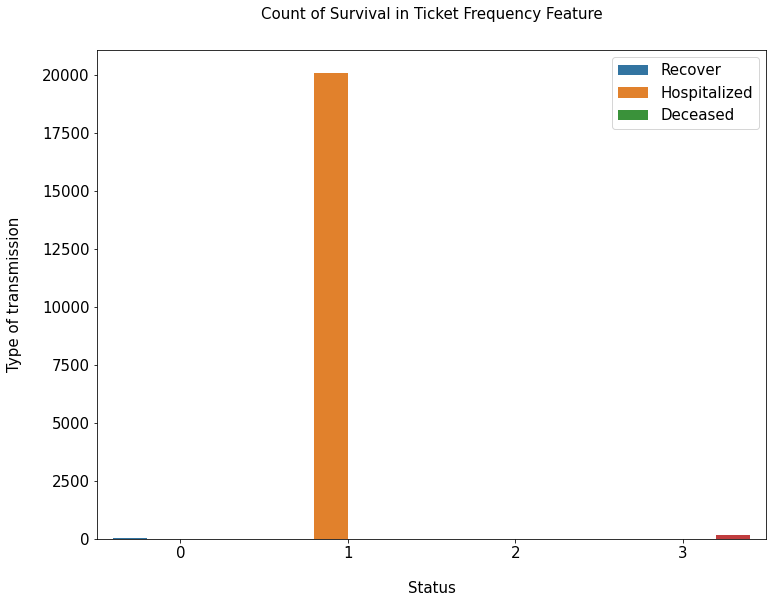

In [249]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Status', hue='Type of transmission', data=data)

plt.xlabel('Status', size=15, labelpad=20)
plt.ylabel('Type of transmission', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Recover', 'Hospitalized', 'Deceased'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.savefig("ticket_freq-survived-corr2.png", dpi=300)

plt.show()

In [250]:
#data['Status'] = data.groupby('Type of transmission')['Type of transmission'].transform('count')  #how to balance the data

#confusion metrics

In [251]:
#data[['Type of transmission', 'Status']].groupby('Type of transmission').mean()

,Status
Type of transmission,
0,45
1,20085
2,1
3,182


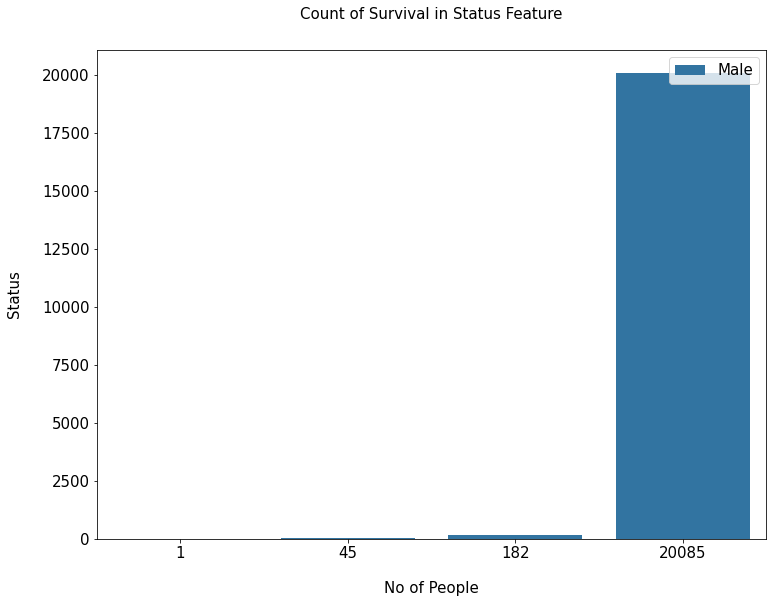

In [255]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Status', hue='Gender', data=data)

plt.xlabel('No of People', size=15, labelpad=20)
plt.ylabel('Status', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Male', 'Female'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Status'), size=15, y=1.05)

plt.savefig("ticket_freq-survived-corr2.png", dpi=300)

plt.show()

# Type Assigned

In [256]:
for x in data.index:
    if data.loc[x, "Type of transmission"] == 5 :
        data["Status"].fillna(1, inplace = True)

In [257]:
data.tail(50)
#linear regression that takes ..

,Date,Age,Gender,District,Status,Type of transmission,CDate
20264,737537,36.0,1,305,20085,1,737537
20265,737537,36.0,1,305,20085,1,737537
20266,737537,36.0,1,305,20085,1,737537
20267,737537,36.0,1,305,20085,1,737537
20268,737537,36.0,1,243,20085,1,737537
20269,737537,36.0,1,380,20085,1,737537
20270,737537,36.0,1,380,20085,1,737537
20271,737537,36.0,1,223,20085,1,737537
20272,737537,36.0,1,223,20085,1,737537
20273,737537,36.0,1,223,20085,1,737537


# Change Date data mining

In [433]:
data['CDate'].median()

18042020.0